# SIMPLE LINEAR REGRESSION (AT~Waist) - Transformation

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn


In [45]:
wcat = pd.read_csv("wc-at.csv")

In [46]:
#wcat

In [47]:
wcat.shape

(109, 2)

In [48]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [49]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [50]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

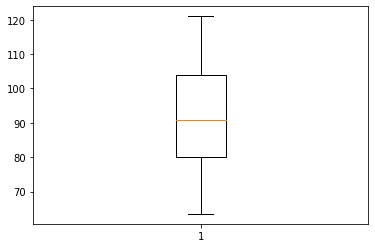

In [51]:
plt.boxplot(wcat.Waist)
plt.show()

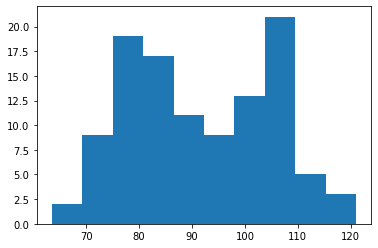

In [52]:
plt.hist(wcat.Waist)
plt.show()

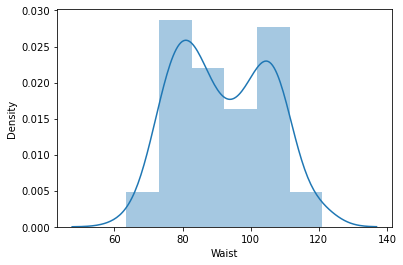

In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot (wcat['Waist'])
plt.show()

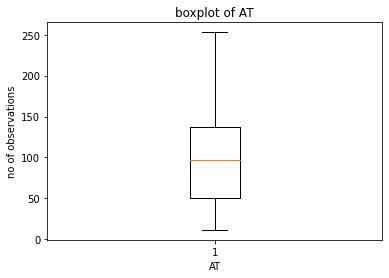

In [11]:
plt.boxplot(wcat.AT)
plt.xlabel('AT')
plt.ylabel('no of observations')
plt.title("boxplot of AT")
plt.show()

In [12]:
#plt.boxplot(wcat.AT)
#plt.show()

In [13]:
#plt.hist(wcat.AT)
#plt.show()

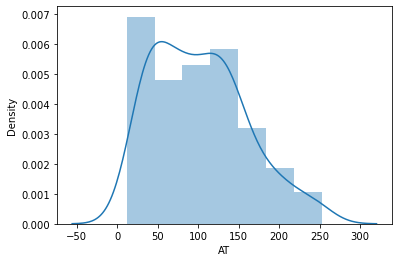

In [14]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot (wcat['AT'])
plt.show()

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

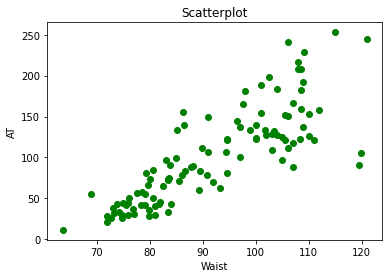

In [53]:
# SCATTERPLOT
plt.plot(wcat.Waist, wcat.AT, "go")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("Scatterplot")
help(plt.plot)

In [16]:
#correlation btn Waist and AT
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [54]:
#Fitting a model/ building a model
import statsmodels.formula.api as smf
model = smf.ols('AT~Waist', data= wcat).fit()
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.62e-27
Time:                        18:30:58   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#wcat(actual value)
#pred=(model.predict(wcat.Waist))- (predicted value)
#model.resid(error/residual)

In [60]:
#wcat

In [61]:
#pred = model.predict(wcat.Waist)
#pred

In [62]:
#model.resid

In [22]:
#model.resid_pearson for later use

In [23]:
#print(model.conf_int(0.05))

In [68]:
#nean squared error
mse = (np.mean((np.array(wcat['AT'])-np.array(pred))**2))
mse

1073.2292295533819

In [63]:
#RMSE- Root mean square errors
rmse_lin = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
rmse_lin

32.760177495755144

Text(0.5, 1.0, 'Scatterplot')

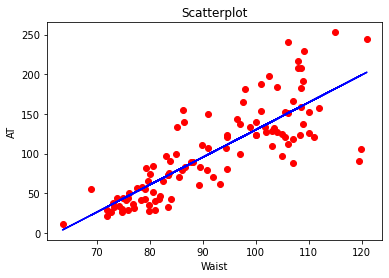

In [25]:
#scatterplot for regression model

plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='red')
plt.plot(wcat['Waist'], pred, color="blue")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("Scatterplot")

In [98]:
#regression plot
#sns.regplot(x='Waist', y='AT', data=wcat, color='mediumorchid')

In [27]:
pred.corr(wcat.AT)

0.818557812895853

# Fitting with diff equation
## transformation:
### 1.Log transformation
### 2.Exponential transformation
### 3.Logerthemic quadrantic model

# 1.Log transformation

In [28]:
# 1. Log transformation
model2 = smf.ols('AT~np.log(Waist)', data=wcat).fit()
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           6.80e-28
Time:                        18:31:00   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#wcat---> actual value
#predlog= model2.predict(wcat.Waist)--->predicted value
#model2.resid---> error/residual
#model2.resid_pearson

In [78]:
#pridiction values
predlog = model2.predict(pd.DataFrame(wcat['Waist']))
predlog

#or
predlog = model2.predict(wcat.Waist)
predlog

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [81]:
# RMSE for log transformation
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(predlog))**2))
rmse_log

32.496884909321274

In [32]:
#error corr
pred2.corr(wcat.AT)

0.8217781862645356

Text(0, 0.5, 'TISSUE')

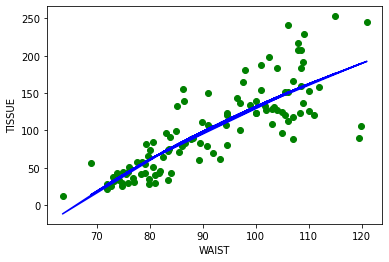

In [83]:
#scatterplot for log
plt.scatter(x=wcat['Waist'],y=wcat['AT'], color='green')
plt.plot(wcat['Waist'],predlog,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

# 2.Exponential transformation

In [34]:
# 2. Exponential transformation
model3 = smf.ols('np.log(AT) ~ Waist', data= wcat).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.68e-30
Time:                        18:31:01   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#wcat---> actual value
#predexp= model3.predict(wcat.Waist)--->predicted value
#model3.resid---> error/residual
#model3.resid_pearson

In [87]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [84]:
#prediction for Exponential
#predexp =model3.predict(pd.DataFrame(wcat['Waist']))
#predexp

# or

predexp = model3.predict(wcat['Waist'])
predexp


0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [85]:
# AS we we have used log(AT) in preparing model so we need to convert it back 
#      BO+B1(WC)
# AT= e 
pred3=np.exp(predexp)
pred3


0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [88]:
#model3.resid

In [89]:
#RMSE for EXP
rmse_exp = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred3))**2))
rmse_exp

38.52900175807141

In [90]:
pred3.corr(wcat.AT)

0.7633804583650532

Text(0, 0.5, 'TISSUE')

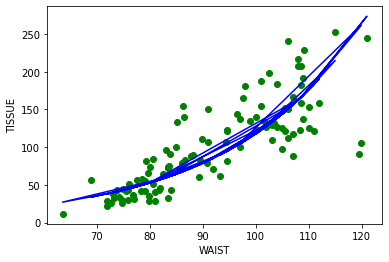

In [91]:
#scatterplot for exp
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat.Waist,pred3,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

In [40]:
#plt.plot(wcat['Waist'],wcat['AT'], 'bo')  
#plt.plot(wcat.Waist,pred3,color='red')

In [41]:
#residual
#model3.resid
model3.resid_pearson

array([-1.42426841, -1.16036536, -0.79857367, -1.03053611, -0.99183029,
       -1.57770329, -1.77782943, -1.7063649 , -2.43678253, -0.60898882,
       -0.82630708,  0.05965107, -0.11441073, -0.48719133, -1.15546702,
        1.44239166, -0.05388192, -0.61457662,  0.16338349, -1.18519137,
       -0.66413371, -0.85671265, -1.10408983, -0.66788034, -0.61366891,
       -0.53854217,  0.559278  ,  1.28377825,  0.46848176,  0.30798929,
        0.51662718,  0.58049434, -0.07722426,  0.24329581, -0.00731172,
        0.71101855,  0.76180321, -0.07709724,  0.97229834,  0.26937281,
        0.53880043,  0.34505495, -0.14698466,  2.03681962,  1.38280011,
       -0.79731502,  0.38539598,  0.75747349,  0.67811133,  1.31762395,
        1.00267879,  1.11566466,  2.03975207, -0.12692781, -0.4705888 ,
        0.44867784,  0.60008028,  2.34805258,  0.21771996,  0.59055788,
        0.50813615,  1.25820146, -1.76365553, -0.81659309, -2.97779536,
       -2.56121918,  0.97601914, -0.5436722 , -1.10931613,  0.18

# 3. log+quadratic equation

In [104]:
#square of waist
wcat['Waist_sq'] = wcat.Waist*wcat.Waist
#wcat

In [107]:
model_quad = smf.ols("np.log(AT)~Waist+Waist_sq", data=wcat).fit()

In [108]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.80e-35
Time:                        19:51:44   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#find out the error for quad equation
pred_quad = model_quad.predict(wcat)
pred4= np.exp(pred_quad) # as we used log(AT)
pred4

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [111]:
rmse_quad= np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred4))**2))
rmse_quad

32.244447827762386

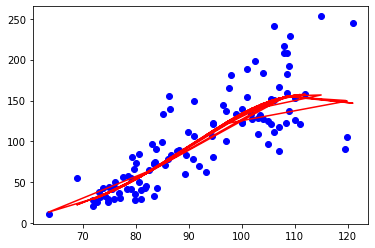

In [112]:
plt.scatter(wcat.Waist,wcat.AT, c='b')
plt.plot(wcat.Waist,pred4, 'r')

In [113]:
 # comparing the models
data = {"MODEL": pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
       "RMSE_VALUES": pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
       "RSQUARE": pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table = pd.DataFrame(data)
table

,MODEL,RMSE_VALUES,RSQUARE
0,rmse_lin,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982


# model validation technique

Text(0, 0.5, 'standardized residual')

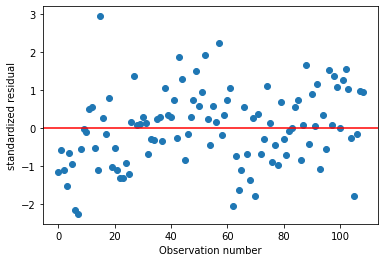

In [119]:
#model4 - creating scatterplot
#mean value = zero
#stdardized residual should have constant varience

plt.scatter(np.arange(109),model_quad.resid_pearson)
plt.axhline(y=0, color= 'red')
plt.xlabel('Observation number')
plt.ylabel('standardized residual')

In [117]:
#plt.hist(model_quad.resid_pearson)
#plt.show()

# To change style of visualization

In [120]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [123]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

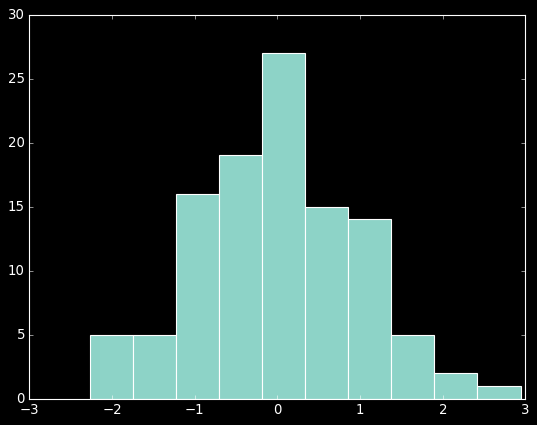

In [127]:
#plt.scatter(np.arange(109),model_quad.resid_pearson)
#plt.axhline(y=0, color= 'red')

plt.hist(model_quad.resid_pearson)
plt.show()